In [26]:
#타랑께 이용지점 빈도수
import pandas as pd
import numpy as np
a = pd.read_csv('자전거_사용시간_최종.csv',index_col = 0,encoding = 'cp949')
df = pd.DataFrame(a)

df

,출발시각,도착시각,사용시간
0,2020-07-01 8:25,2020-07-01 8:31,0 days 00:06:24
1,2020-07-01 11:21,2020-07-01 12:24,0 days 01:02:50
2,2020-07-01 11:34,2020-07-01 11:44,0 days 00:09:59
3,2020-07-01 11:40,2020-07-01 11:59,0 days 00:18:59
4,2020-07-01 12:45,2020-07-01 12:54,0 days 00:08:58
...,...,...,...
10860,2021-02-05 13:59,2021-02-05 14:07,0 days 00:07:28
10861,2021-02-05 14:11,2021-02-05 14:29,0 days 00:18:05
10862,2021-02-05 14:16,2021-02-05 15:30,0 days 01:14:11
10863,2021-02-05 14:50,2021-02-05 18:40,0 days 03:49:59


# 월별 현황

In [3]:
start=[] 
for x in range(0, len(df)):
    start.append(df['출발시각'][x]) #출발시각 열 추출
type(start)

list

In [4]:
start[0]

'2020-07-01 8:25'

In [5]:
start[0][0:4] #연도추출

'2020'

In [6]:
start[0][5:7] 

'07'

In [7]:
month = []
for i in range(0, len(df)):
    month.append(start[i][5:7]) #월 추출

In [8]:
len(month)

10865

In [9]:
print(month.count('07'))

446


In [10]:
dict = {}  #월별 이용량 추출 키,밸류 방식
for v in month:
    if dict.get(v): dict[v]+=1
    else : dict[v]=1
        
print(dict)

{'07': 446, '08': 1438, '09': 2723, '10': 3594, '11': 1324, '12': 629, '01': 582, '02': 129}


In [11]:
y = (list(dict.values()))# 월별 이용량 밸류 값 리스트 지정
x = (list(dict.keys()))#월별 키값 리스트

In [12]:
print(x)
print(y)

['07', '08', '09', '10', '11', '12', '01', '02']
[446, 1438, 2723, 3594, 1324, 629, 582, 129]


--------

# 시간대별 현황

In [13]:
usage=[]
for x in range(0, len(df)):
    usage.append(df['사용시간'][x]) #사용시간 열 추출
type(usage)

list

In [14]:
usage[0] 

'0 days 00:06:24'

In [15]:
usage[0][10:12]

'06'

In [16]:
minute = []
for i in range(0, len(df)):
    minute.append(usage[i][10:12]) #사용시간 (분 추출)

In [17]:
minute.sort()

In [18]:
dict1 = {}
for v in minute:
    if dict1.get(v): dict1[v]+=1   
    else : dict1[v]=1   #시간대 별 이용량 추출
        
print(dict1)

{'00': 87, '01': 80, '02': 291, '03': 402, '04': 464, '05': 551, '06': 552, '07': 511, '08': 487, '09': 473, '10': 359, '11': 355, '12': 312, '13': 291, '14': 246, '15': 245, '16': 241, '17': 209, '18': 225, '19': 206, '20': 168, '21': 217, '22': 172, '23': 173, '24': 177, '25': 138, '26': 143, '27': 160, '28': 130, '29': 125, '30': 122, '31': 118, '32': 121, '33': 116, '34': 95, '35': 82, '36': 97, '37': 96, '38': 89, '39': 106, '40': 98, '41': 76, '42': 89, '43': 96, '44': 80, '45': 89, '46': 76, '47': 62, '48': 73, '49': 77, '50': 81, '51': 81, '52': 92, '53': 77, '54': 79, '55': 92, '56': 82, '57': 84, '58': 76, '59': 73}


In [19]:
x = (list(dict1.keys()))
y = (list(dict1.values()))

In [20]:
print(x)
print(y)

['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59']
[87, 80, 291, 402, 464, 551, 552, 511, 487, 473, 359, 355, 312, 291, 246, 245, 241, 209, 225, 206, 168, 217, 172, 173, 177, 138, 143, 160, 130, 125, 122, 118, 121, 116, 95, 82, 97, 96, 89, 106, 98, 76, 89, 96, 80, 89, 76, 62, 73, 77, 81, 81, 92, 77, 79, 92, 82, 84, 76, 73]


In [21]:
y[0:10]

[87, 80, 291, 402, 464, 551, 552, 511, 487, 473]

In [22]:
minute_by_10 = []   #시간대별 시각화 위해 10분 단위로 이용량 나누기
division = [10, 20, 30, 40, 50, 60]
for i in division:
    a = sum(y[i-10:i])
    minute_by_10.append(a)

In [23]:
minute_by_10

[3898, 2689, 1603, 1042, 816, 817]

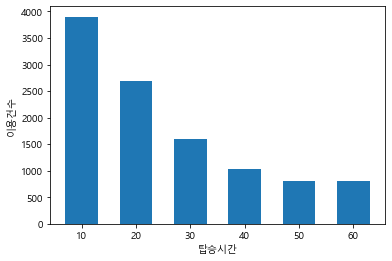

In [24]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.xlabel('탑승시간')
plt.ylabel('이용건수')
plt.bar(division, minute_by_10, width=6) #시간대별 시각화
plt.show()

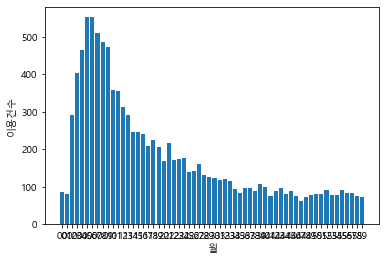

In [25]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.bar(x, y)
plt.xlabel('월')
plt.ylabel('이용건수')
plt.show()